# Assignment 5

#### Angelo Rosace

#### 1st assignment statement

We want to make categories for the apartments: Really cheap (cheaper than one standard deviation of the price distribution ─we assume it Normal─ to the lower side), Cheap (between the really cheap ones and the average price), Expensive (between the average and one standard deviation to higher side), and Really expensive (more than one standard deviation to the higher side).

How many apartments have each category?

In order to answer the question I will first load the data, calculte the standar deviation for the price variable and then categorize my data according to the scale described above.

In [3]:
import pandas as pd
import statistics as stat
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree

The mean for the price variable is: 134.58742901899353
The standard deviation of the price variable is: 478.9682699872338


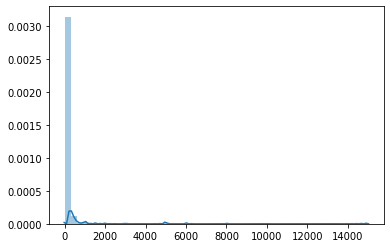

In [4]:
#load data into a data frame
appartments = pd.read_csv("listings.csv", header=[0], sep=",")
#calculate price std deviation
prices = list(appartments["price"])
price_std = stat.stdev(prices)
mean = stat.mean(prices)
sns.distplot(prices)
print("The mean for the price variable is:",mean)
print("The standard deviation of the price variable is:",price_std)

As we can see from the value of the standard deviation above, it is a very large one. That menas both that the data for the price variable are very diverse and sparse and that there is a lot of variation that can be explained by other variables in the dataset. Since the standard deviation is bigger then the mean if I try to get the "very cheap" appartments (that are the ones laying more than one standard deviation away from the mean), I will actually look at negative values. Not having any negative value for the price varaible I will get 0 results from counting how many "really cheap" appartmens there are in my dataset. So by counting how many appartments I have in each category of price I will obtain:

In [7]:
very_cheap = [p for p in prices if p <= (-price_std)]
cheap = [p for p in prices if p > (-price_std) and p <= mean]
expansive = [p for p in prices if p > mean and p <= (mean+price_std)]
very_expansive = [p for p in prices if p > price_std]
print(len(very_cheap), "very cheap appartments")
print(len(cheap), "cheap appartments")
print(len(expansive), "expansive appartments")
print(len(very_expansive), "very expansive appartments")

0 very cheap appartments
16747 cheap appartments
3307 expansive appartments
597 very expansive appartments


#### 2nd Assignment statement

We want to know what feature defines better the price between the following features:
neighbourhood_group, neighbourhood, latitude, longitude, room_type, minimum_nights,
number_of_reviews, reviews_per_month, availability_365.
Make a Decision Tree Classifier, plot the resulting decision tree and draw your conclusions.

Since I have some strings in my data and I want to take them in account for my analysis I will factorize them.
Factorizing them will allow me to categorize them.
Moreover, looking at the data is possible to notice some NaN values. We want to impute them. 
We decided to impute them just by replacing the NaN value with a 0. That was done because the only varaible that seem to take NaN values was "number_of_reviews". We a priori consider that varaible to be 0 because it could actually be possible that users left 0 reviews for a given appartment.

[Text(1307.124920948155, 2143.337142857143, 'X[4] <= 0.5\ngini = 0.721\nsamples = 20428\nvalue = [3521, 6876, 6807, 3224]'),
 Text(569.681947023957, 2081.2114285714288, 'X[5] <= 26.5\ngini = 0.619\nsamples = 9268\nvalue = [170, 1708, 4804, 2586]'),
 Text(324.6786082012563, 2019.0857142857144, 'X[0] <= 1.5\ngini = 0.554\nsamples = 6449\nvalue = [25, 496, 3570, 2358]'),
 Text(175.24462286665516, 1956.96, 'X[6] <= 56.5\ngini = 0.547\nsamples = 3426\nvalue = [3, 180, 1729, 1514]'),
 Text(82.85495544757143, 1894.8342857142857, 'X[8] <= 148.5\ngini = 0.543\nsamples = 2229\nvalue = [3, 101, 1028, 1097]'),
 Text(26.272311231306297, 1832.7085714285715, 'X[1] <= 0.5\ngini = 0.538\nsamples = 592\nvalue = [2, 33, 332, 225]'),
 Text(15.16381502391932, 1770.5828571428572, 'X[3] <= 2.183\ngini = 0.398\nsamples = 32\nvalue = [0, 2, 6, 24]'),
 Text(14.369434986855147, 1708.457142857143, 'X[2] <= 41.412\ngini = 0.145\nsamples = 26\nvalue = [0, 1, 1, 24]'),
 Text(13.97224496832306, 1646.3314285714287, 'X

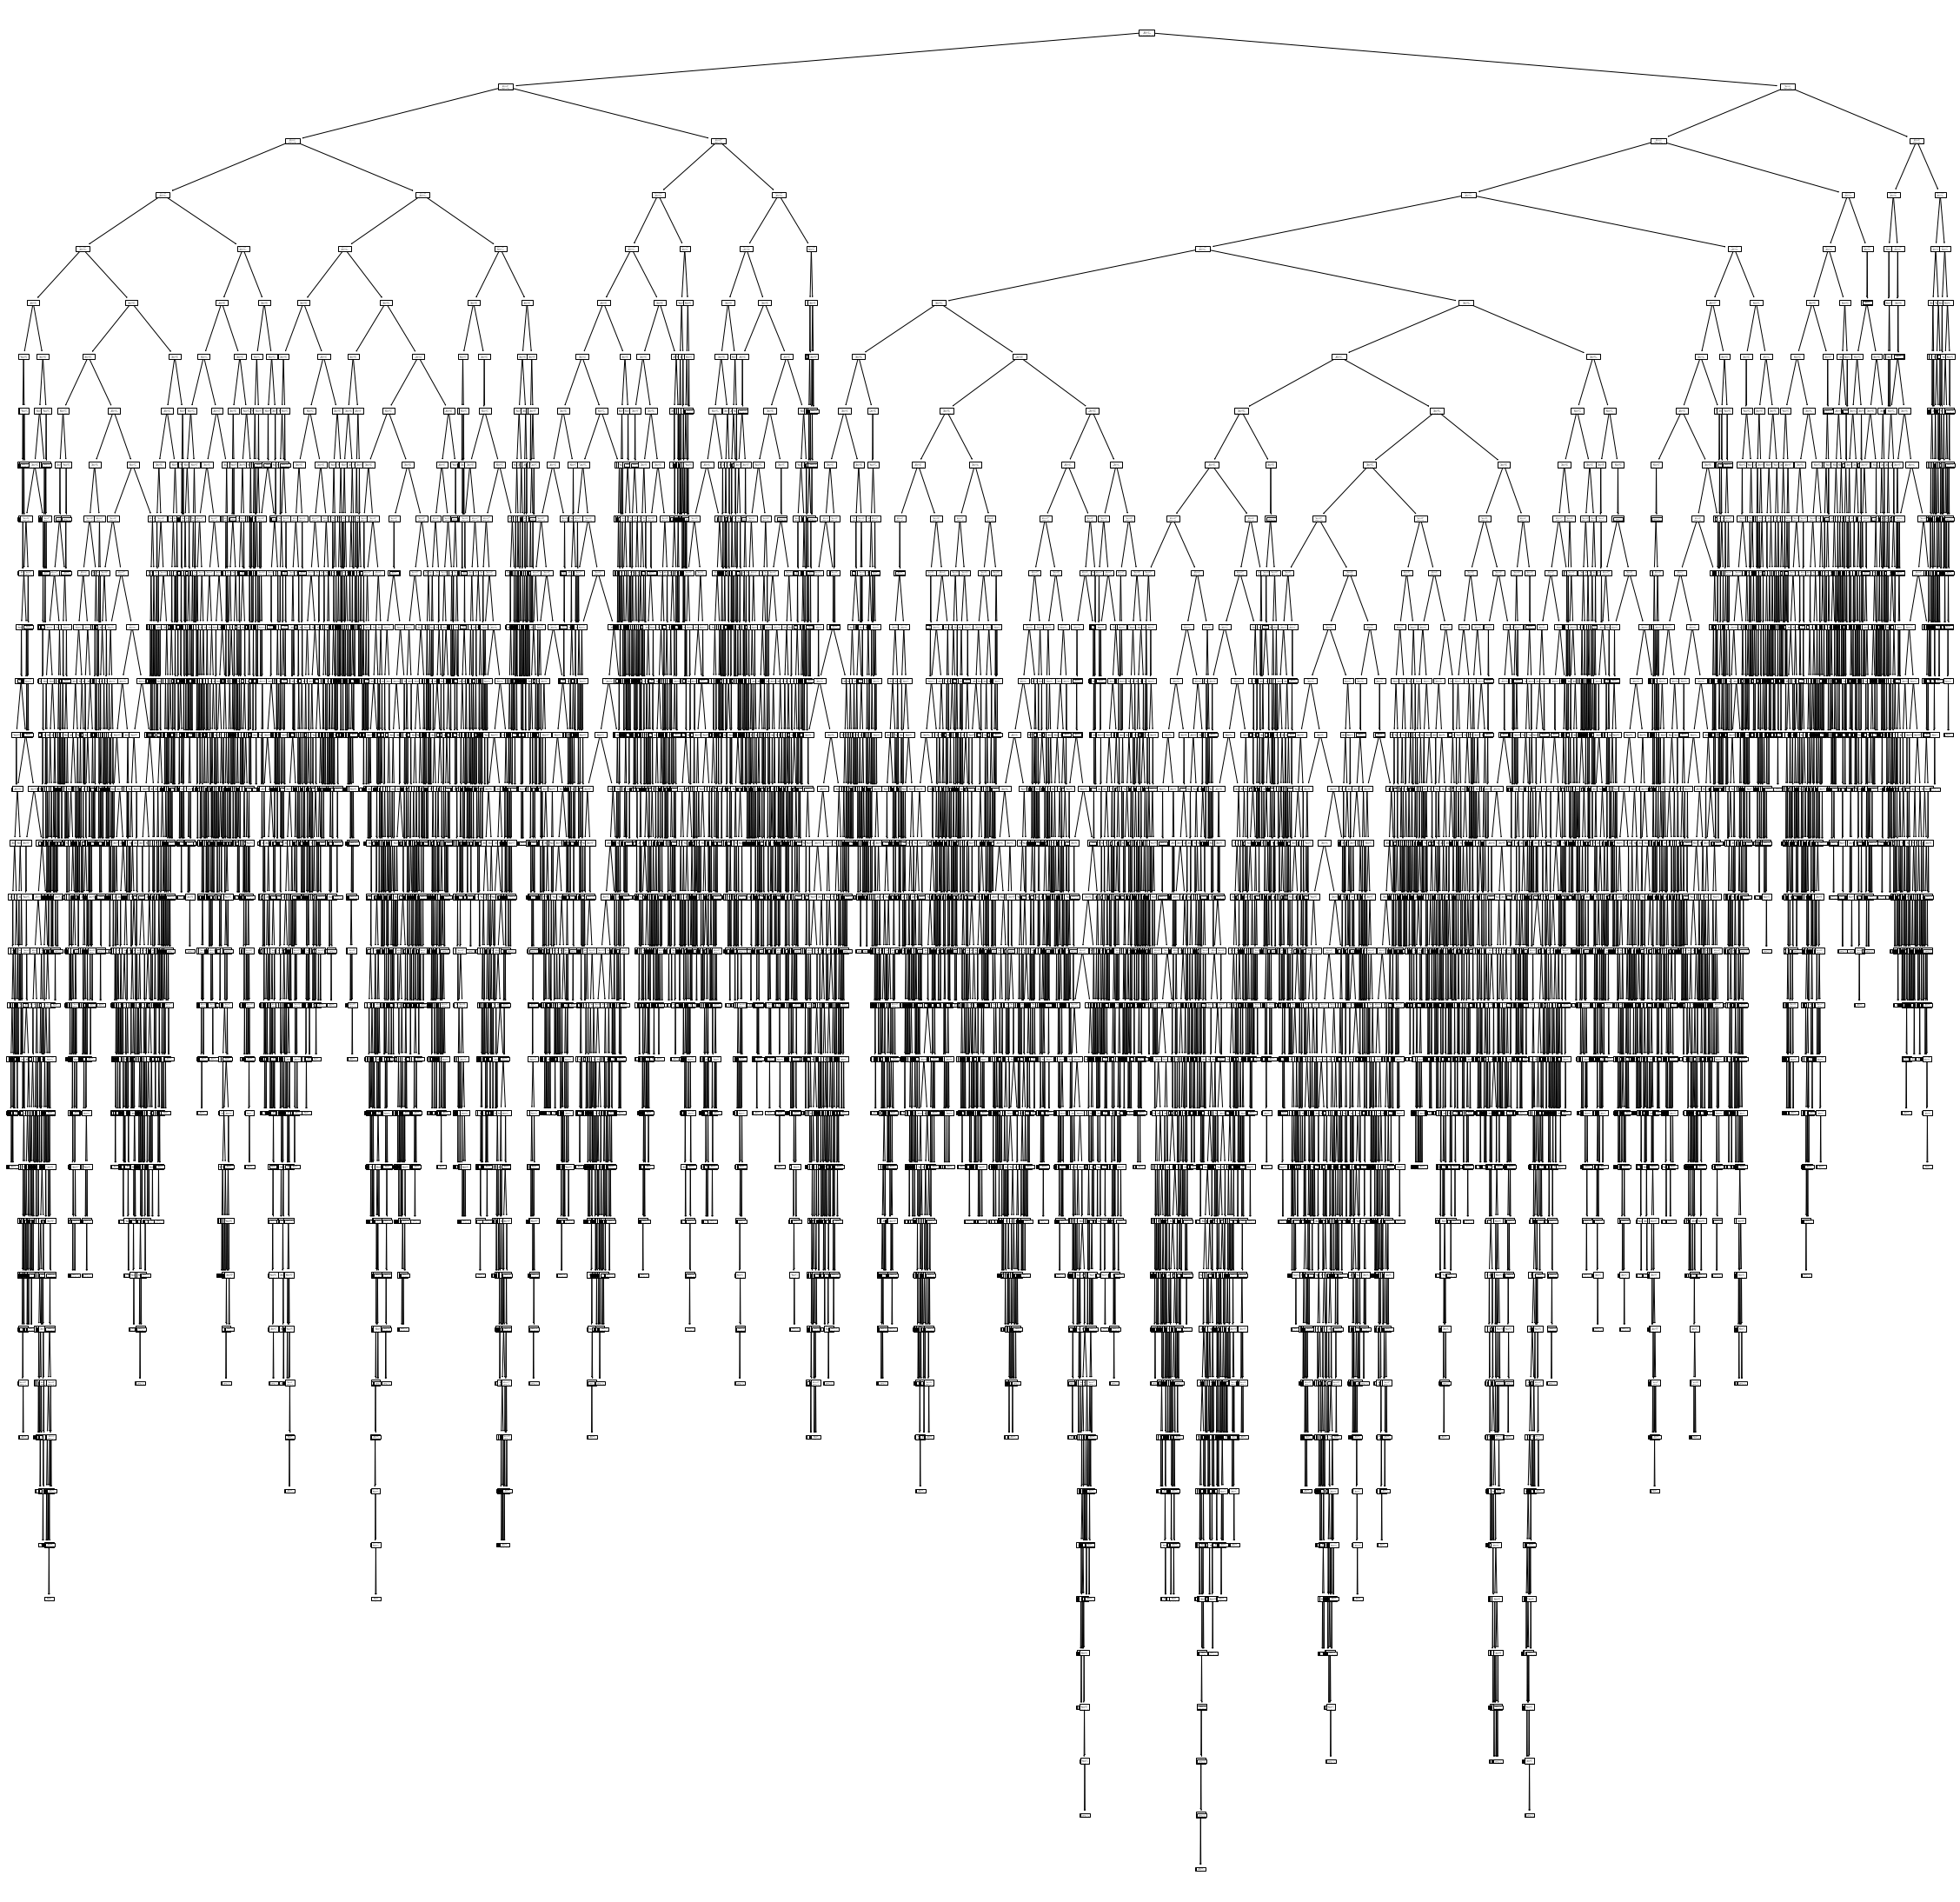

In [57]:
import matplotlib.pyplot as plt

#impute data
appartments.fillna(0, inplace=True)

#categorize variables
for i in appartments:
    if appartments[i].dtype == "object":
        appartments[i] = pd.factorize(appartments[i])[0]

#select just varaibles we are interested in
appartments_for_classification = appartments[["neighbourhood_group","neighbourhood","latitude","longitude","room_type","minimum_nights","number_of_reviews","reviews_per_month","availability_365"]]
    
#prepare categories array
cat = []
for p in t:
    if p <= (-std):
        cat.append(1)
    if p > (-std) and p <= mu:
        cat.append(2)
    if p > mu and p <= (mu+std):
        cat.append(3)
    if p > std:
        cat.append(4)

#Classify
classifier = DecisionTreeClassifier()
#classifier = classifier.fit(appartments_for_classification, cat)
fig=plt.figure(figsize=(40, 40))
plot_tree(classifier.fit(appartments_for_classification, cat))

Due to the size of the decision tree it is unreadable if we don't zoom very close to the nodes. Fortunately, looking at the output of the the fit method we can read that the variable that most explains the variation in the data is:

In [60]:
print(list(appartments_for_classification.columns)[4])

room_type


#### 3rd Assignment statement

Try two Random Forests Classification: one classifying the apartments with the previous categories as classes of apartments, and a second one where the numerical price is the classifier feature. Measure the out-of-bag accuracy (you will have to set the
oob_score=True to be able to get within the variable oob_score_ the score otherwise is not computed). Which one works better?

Let's first implement the random forest model for classifying the appartments with the previous categories as classes of appartments.

In [69]:
from sklearn.ensemble import RandomForestClassifier
#np.seterr(divide='ignore', invalid='ignore')

rand_forest_classifier = RandomForestClassifier(n_estimators=500, oob_score=True)
classifier = rand_forest_classifier.fit(appartments_for_classification, cat)

The random forest model has a score of:

In [80]:
score_classifier = classifier.oob_score_
print('Score: ', score_classifier)

Score:  0.6132269434110045


Let's now implement the random forest model for classifying the appartments where the numerical price is the classifier feature.

In [72]:
rand_forest_classifier1 = RandomForestClassifier(n_estimators=500, oob_score=True)
classifier1 = rand_forest_classifier1.fit(appartments_for_classification, appartments["price"])

The random forest model has a score of:

In [79]:
score_classifier1 = classifier1.oob_score_
print('Score: ', score_classifier1)

Score:  0.14857058938711573


As we can see from the results: the out of the box score for the first model (the one for the appartments classified according to the 4 price categories) is higher then the one of the second model. That could mean that, by introducing more categories (one for each diiferent numerical value of the price variable) in the second model, we are actually not helping it to achieve better results. That could be due to overfitting or to a too much high sparseness of the data that instead of being classified in 4 categories as in the first model are now classified in way more categories.